In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('calendar_week_nov_4_8_2024.csv')
df.head(20)

,date,lesson_time,code,location,size
0,"Monday, 4 November 2024",09:00 - 11:00,6011P0168Y,REC M1.01,220
1,"Monday, 4 November 2024",09:00 - 11:00,6011P0283Y,REC A0.01,450
2,"Monday, 4 November 2024",09:00 - 11:00,6011P0209Y,REC M3.02 (HLT),450
3,"Monday, 4 November 2024",09:00 - 11:00,6012B0423Y,REC V2.03,35
4,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC E0.22 (Active Learning Space),40


In [4]:
# Filter all events that are not in REC
print(f"Old length: {len(df)}")
df = df[df['location'].str.contains('REC')]
# Add new columns to separate start and end time
df['start_time'] = df['lesson_time'].str.split(' - ').str[0]
df['end_time'] = df['lesson_time'].str.split(' - ').str[1]
# Remove all duplicates
df = df.drop_duplicates()
print(f"New length: {len(df)}")
df.head()


Old length: 8392
New length: 2588


,date,lesson_time,code,location,size,start_time,end_time
0,"Monday, 4 November 2024",09:00 - 11:00,6011P0168Y,REC M1.01,220,09:00,11:00
1,"Monday, 4 November 2024",09:00 - 11:00,6011P0283Y,REC A0.01,450,09:00,11:00
2,"Monday, 4 November 2024",09:00 - 11:00,6011P0209Y,REC M3.02 (HLT),450,09:00,11:00
3,"Monday, 4 November 2024",09:00 - 11:00,6012B0423Y,REC V2.03,35,09:00,11:00
4,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC E0.22 (Active Learning Space),40,09:00,11:00


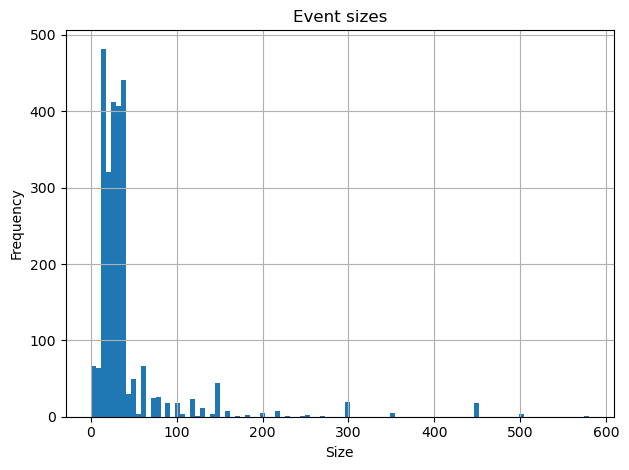

In [5]:
df['size'].hist(bins=100)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Event sizes')
plt.grid(True)
plt.tight_layout()
plt.show()

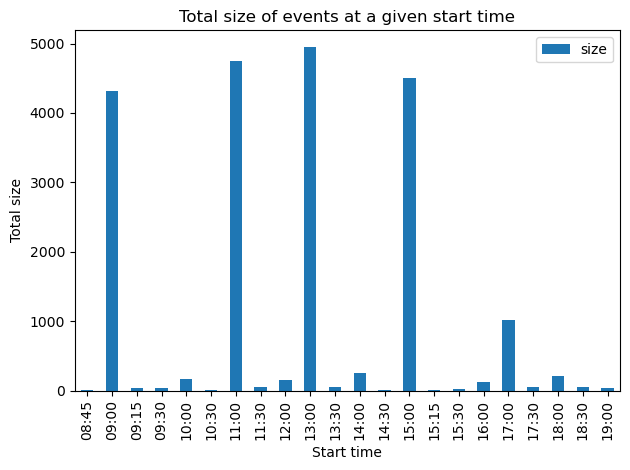

In [8]:
df_sum = df.groupby('start_time')['size'].sum().reset_index()
df_sum['size'] = df_sum['size'] / 5
df_sum.head()
# plot df_sum
df_sum.plot(x='start_time', y='size', kind='bar')
plt.xlabel('Start time')
plt.ylabel('Total size')
plt.title('Total size of events at a given start time')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Average size of events at a given start time'}, xlabel='Start time', ylabel='Total size'>

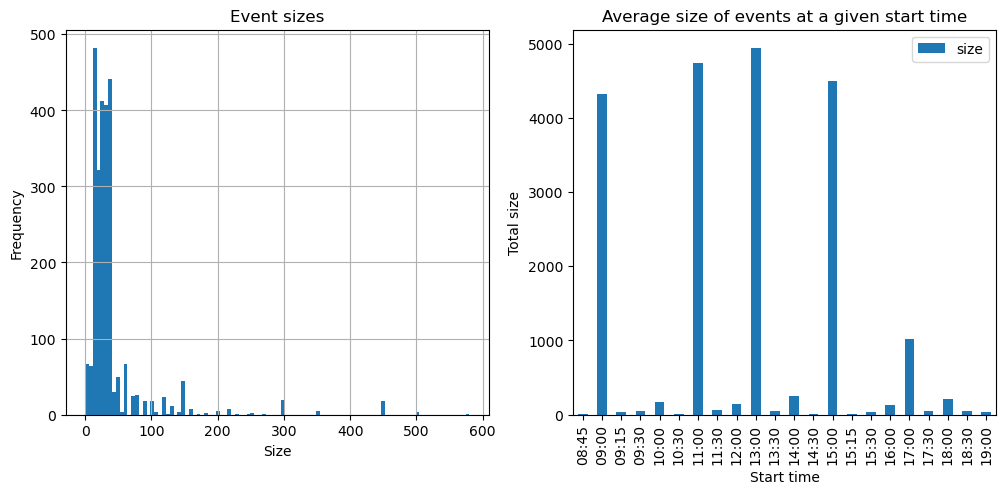

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
df['size'].hist(bins=100, ax=axs[0])
axs[0].set_xlabel('Size')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Event sizes')
axs[0].grid(True)
df_sum.plot(x='start_time', y='size', kind='bar', ax=axs[1], xlabel="Start time", ylabel="Total size", title="Average size of events at a given start time")
